In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_4.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 0.5
part_sd = 1.5

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

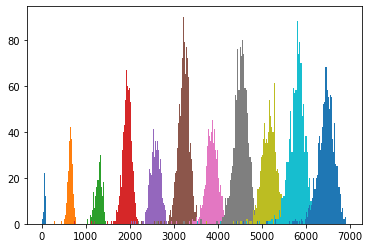

In [3]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [5]:
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

mus = {}
delta_mus = {}

In [6]:
def proc_calibration(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy[number]
    n, bins, patches = plt.hist(data[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    mus[en] = mu
    delta_mus[en] = delta_mu
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))

mu = 64.94538063997116 +- 0.711050807131191
sigma = 15.038575562459549 +- 0.6315194597895164
nevents = 767.7817972589128 +- 32.945273961203306


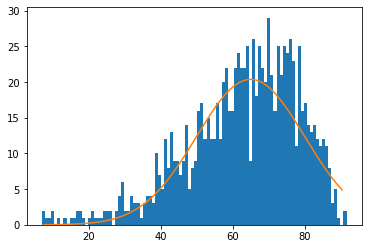

In [8]:
proc_calibration(0, 100, [70, 40, 10000])

mu = 646.1128470522368 +- 1.9168545096032792
sigma = 49.85046085078774 +- 1.5275368200899162
nevents = 4756.805483177287 +- 177.30893787721598


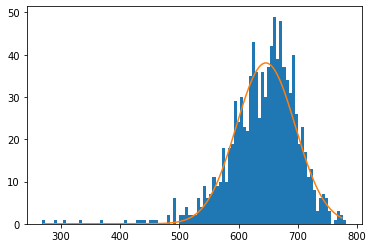

In [11]:
proc_calibration(1, 100, [650, 50, 10000])

mu = 1297.1465063705446 +- 2.6914755440271665
sigma = 74.14798126656513 +- 2.173631811500602
nevents = 4892.829942494178 +- 168.5322014034954


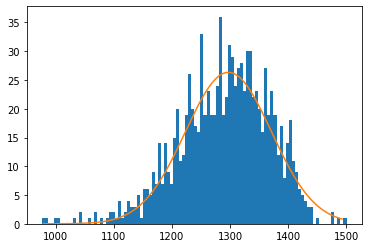

In [13]:
proc_calibration(2, 100, [1300, 70, 10000])

mu = 1944.2552651406988 +- 2.9356191046871163
sigma = 93.14042292843125 +- 2.3547690197166564
nevents = 13995.542761212135 +- 430.2824804284595


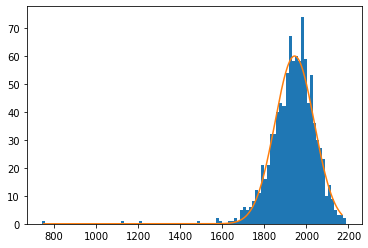

In [15]:
proc_calibration(3, 100, [2000, 100, 10000])

mu = 2588.972572303205 +- 3.952358305987111
sigma = 99.92315952128044 +- 3.083898552179804
nevents = 8899.28442334973 +- 338.9633960323316


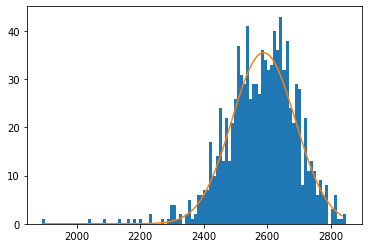

In [16]:
proc_calibration(4, 100, [2500, 100, 10000])

mu = 3236.996378601362 +- 4.41419685271323
sigma = 119.66403365229912 +- 3.627697860826195
nevents = 22627.791681141574 +- 795.6451215543558


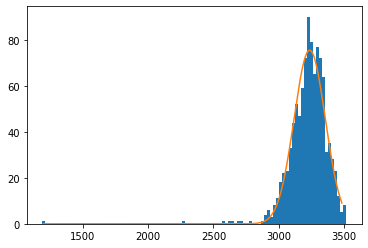

In [18]:
proc_calibration(5, 100, [3300, 100, 10000])

mu = 3879.560401064261 +- 4.420969419725402
sigma = 128.82407492584872 +- 3.3721017029782905
nevents = 13067.737200386086 +- 439.7885162527255


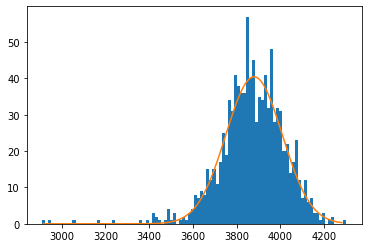

In [19]:
proc_calibration(6, 100, [4000, 150, 10000])

mu = 4532.321586226749 +- 4.363538638360392
sigma = 144.8121216829839 +- 3.3439109345259537
nevents = 27080.364377887316 +- 801.0552286705653


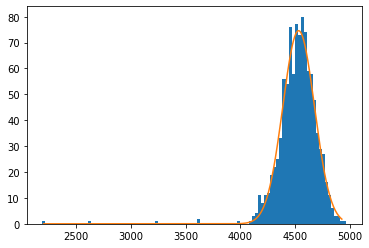

In [20]:
proc_calibration(7, 100, [4500, 150, 10000])

mu = 5170.956550428028 +- 5.503749496429419
sigma = 156.04923696198856 +- 4.196847282964793
nevents = 17944.549153463573 +- 620.9163967327125


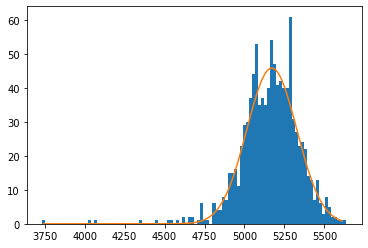

In [21]:
proc_calibration(8, 100, [5000, 160, 10000])

mu = 5811.328087915796 +- 6.192532111939474
sigma = 161.33538311776525 +- 4.724309212251134
nevents = 27115.76906613284 +- 1026.8477052059511


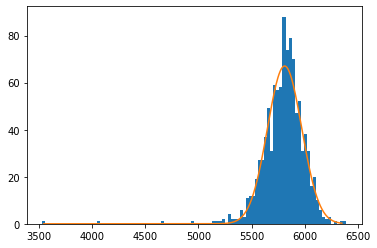

In [22]:
proc_calibration(9, 100, [6000, 150, 10000])

mu = 6473.737584424956 +- 5.919370976563048
sigma = 172.87185378998973 +- 4.711873481797206
nevents = 23861.58879956231 +- 792.751656004516


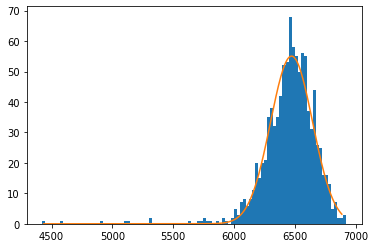

In [24]:
proc_calibration(10, 100, [6500, 150, 10000])

In [25]:
energy_mean= [mus[en] for en in energy]
energy_std = [delta_mus[en] for en in energy]

a = 0.6469230243897399 +- 0.00027664672307342776
b = 0.40633321459506144 +- 0.6536252689178523


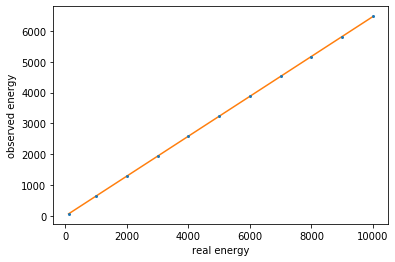

In [26]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [27]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [28]:
f = open("reduction_4.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [29]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]
sigmas = {}
delta_sigmas = {}

In [30]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 497.0595215915887 +- 1.9986284926198319
sigma = 55.237320098340774 +- 1.7157362217562142
nevents = 2143.2335878706454 +- 73.56421095546769
mean = 490.69902754637457
std = 62.14730474619279




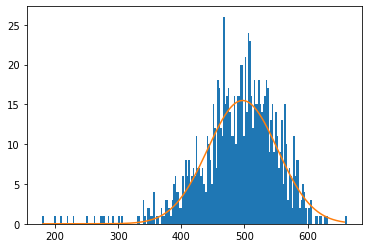

In [53]:
proc(0, 200, [500, 150, 10000])

mu = 1506.3025762655102 +- 3.1999975744190703
sigma = 98.6352159160053 +- 2.6836180222600934
nevents = 3499.96940157716 +- 108.2815262173596
mean = 1497.2548365999494
std = 105.21260944411158




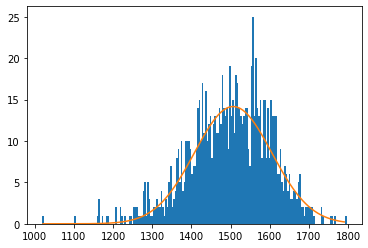

In [55]:
proc(1, 200, [1500, 200, 100000])

mu = 2509.4705225800903 +- 4.922885308306885
sigma = 125.48445095132274 +- 4.315615115812342
nevents = 5280.19513289228 +- 197.4397780142908
mean = 2493.6330577152817
std = 138.0505401934204




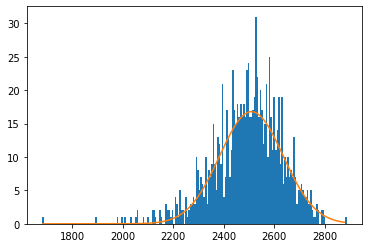

In [56]:
proc(2, 200, [2500, 300, 100000])

mu = 3498.7752949868996 +- 5.86170196118401
sigma = 147.23100840637292 +- 4.91760755075575
nevents = 6587.4567322956955 +- 252.76973257474015
mean = 3491.5961507571733
std = 166.56553406725945




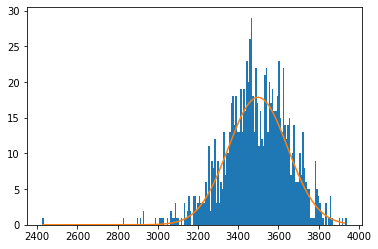

In [57]:
proc(3, 200, [3500, 400, 100000])

mu = 4505.948431905382 +- 5.942272150899617
sigma = 161.09801539223653 +- 4.58279705324818
nevents = 10984.343710460113 +- 394.8492407246995
mean = 4487.696570892753
std = 190.06570320222855




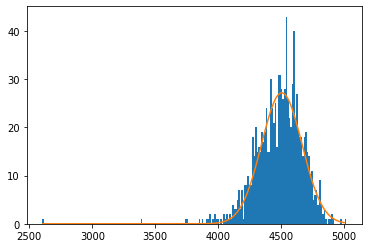

In [58]:
proc(4, 200, [4500, 500, 100000])

mu = 5483.943837125769 +- 7.573478533673914
sigma = 201.1636427377074 +- 5.771725205875577
nevents = 21682.203646203903 +- 787.1551462087332
mean = 5475.380725252144
std = 265.87695183583475




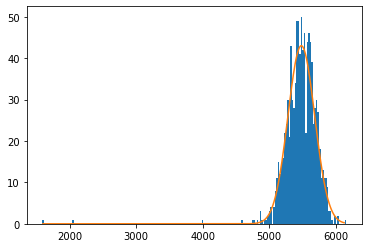

In [59]:
proc(5, 200, [5500, 500, 100000])

mu = 6495.716569387866 +- 7.814659133248971
sigma = 209.35779986849403 +- 6.15970005269854
nevents = 20566.862378690388 +- 752.9234093104556
mean = 6468.509701015632
std = 304.5077386891987




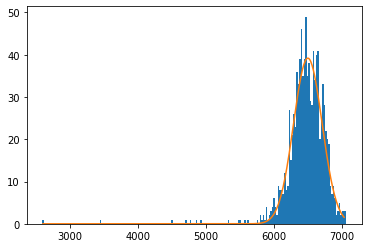

In [60]:
proc(6, 200, [6500, 500, 100000])

mu = 7521.049341310663 +- 8.315145330352356
sigma = 221.74232390757905 +- 7.289449856082036
nevents = 6493.566694573006 +- 224.75240864920534
mean = 7492.4206412775775
std = 229.52710142653464




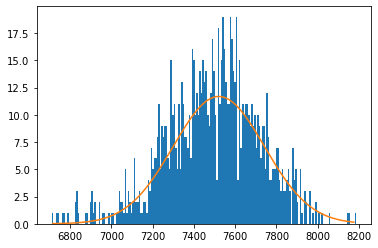

In [61]:
proc(7, 200, [7500, 600, 100000])

mu = 8503.297755068366 +- 7.965126710825302
sigma = 248.94925221546416 +- 6.5161371767081935
nevents = 17373.494021641727 +- 535.2498979524131
mean = 8490.086065009922
std = 284.03402698824726




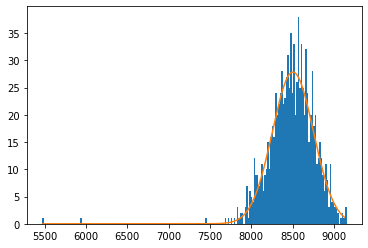

In [62]:
proc(8, 200, [8500, 500, 1000000])

mu = 9485.19979276288 +- 9.718359731205938
sigma = 254.58291982248292 +- 7.774596323665819
nevents = 22228.224619114204 +- 812.2186337899839
mean = 9469.821764906974
std = 311.53974879935146




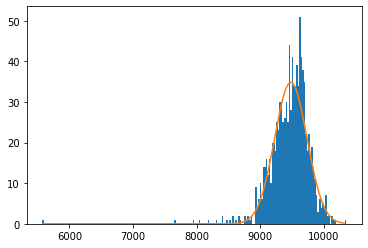

In [63]:
proc(9, 200, [9500, 700, 1000000])

In [64]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.0023638654331326835 +- 0.0012312112595146152
b = 2.4019293103535477 +- 0.08678990663561358


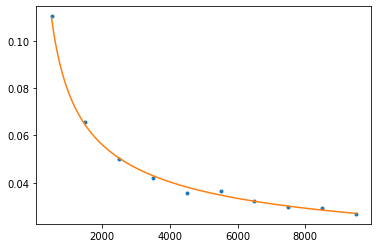

In [65]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [66]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()